# Itsy-Bitsy-Autograd Demo

## Binary Classification Task

This notebook demonstrates how to use the `itsy_bitsy_autograd` package to build and train a simple neural network for binary classification.

In [9]:
from itsy_bitsy_autograd.engine import Value
from itsy_bitsy_autograd.nn import Neuron, Layer, MLP

In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
np.random.seed(101)
random.seed(101)

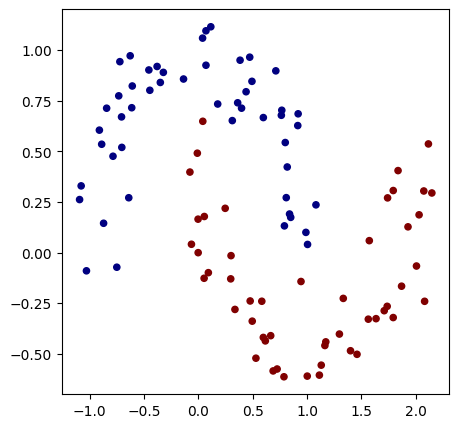

In [12]:
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.125)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [13]:

model = MLP(2, [16, 16, 1]) # 2 layers 
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2), TanH Neuron(2)], Layer of [TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16), TanH Neuron(16)], Layer of [TanH Neuron(16)]]
number of parameters 337


In [14]:
def loss_function(batch_size=None):
    if not batch_size:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size] # randomly choose batch_size amount of values from dataset 
        Xb, yb = X[ri], y[ri]
    
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).tanh() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)




total_loss, acc = loss_function()
print(total_loss, acc)


Value(data=0.46520634392363863, grad=0.0, operation=+) 0.62


In [15]:

for k in range(50):

    total_loss, acc = loss_function()

    model.zero_grad()
    total_loss.backward()

    learning_rate = 1.0 - 0.9 * k/100  # learning rate decay
    for param in model.parameters():
        param.data -= learning_rate * param.grad # update data from back prop
    
    print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.46520634392363863, accuracy 62.0%
step 1 loss 0.31834346863230717, accuracy 75.0%
step 2 loss 0.2618221944555418, accuracy 77.0%
step 3 loss 0.23239537673723773, accuracy 82.0%
step 4 loss 0.21057794027197052, accuracy 82.0%
step 5 loss 0.2019766275219533, accuracy 82.0%
step 6 loss 0.19662272317233714, accuracy 83.0%
step 7 loss 0.19254899850877566, accuracy 83.0%
step 8 loss 0.18915343671417642, accuracy 83.0%
step 9 loss 0.1861134779675099, accuracy 83.0%
step 10 loss 0.18308507833976, accuracy 84.0%
step 11 loss 0.1792679989170595, accuracy 86.0%
step 12 loss 0.17307234746902259, accuracy 86.0%
step 13 loss 0.1664351878708996, accuracy 85.0%
step 14 loss 0.16228429884654594, accuracy 86.0%
step 15 loss 0.15853879981507074, accuracy 87.0%
step 16 loss 0.15468557544641387, accuracy 87.0%
step 17 loss 0.15070282156323672, accuracy 88.0%
step 18 loss 0.1466135006985076, accuracy 90.0%
step 19 loss 0.14327683279121312, accuracy 90.0%
step 20 loss 0.14117310127251345, accur

(-1.6128376595944927, 1.8871623404055073)

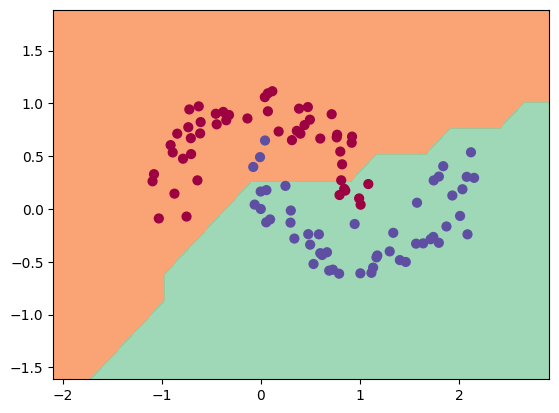

In [16]:
# visualizing the decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())